In [4]:
img_path = '/content/b.jpeg'

1/1 [==============================] - 0s 239ms/step


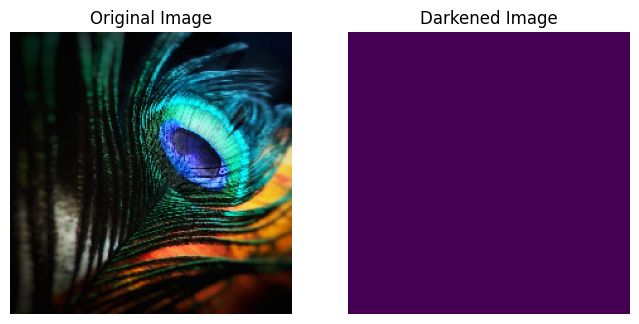

In [5]:
# Exp 8

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an example image
  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Define a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Darken the image using the trained model
darkened_img = model.predict(img_array)

# Display the original and darkened images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
# darkened_img = darkened_img.reshape((224, 224, 3))
plt.imshow(darkened_img)
plt.title('Darkened Image')
plt.axis('off')

plt.show()

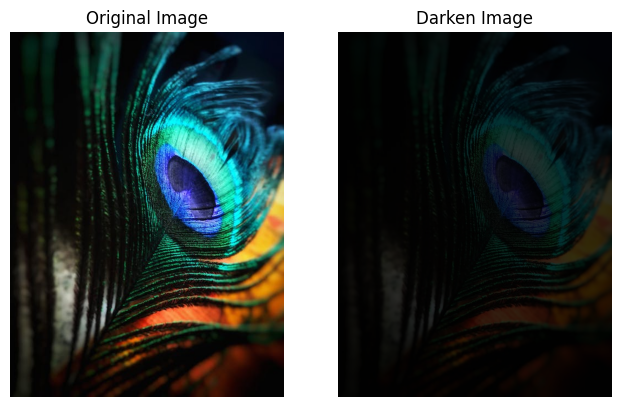

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve

def darken_image(image, darkness_factor):
    # Define a 2D kernel for darkening
    kernel = np.array([[darkness_factor]])

    # Apply the kernel separately to each channel
    darkened_image = np.zeros_like(image)
    for i in range(image.shape[-1]):
        darkened_image[..., i] = convolve(image[..., i], kernel)

    # Clip values to ensure they are within the valid pixel intensity range (0-255)
    darkened_image = np.clip(darkened_image, 0, 255).astype(np.uint8)

    return darkened_image

# Load an example image
original_img = np.array(Image.open(img_path))

darkness_factor = 0.8
darkened_img = darken_image(original_img, darkness_factor)

# Plotting the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(original_img - darkened_img)  # Show the difference (change) separately
plt.title('Darken Image')
plt.axis('off')

plt.show()
